In [60]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [54]:
dir = r"C:\Users\suyog\Desktop\monsoon_24\capstone-legal-docs-analysis\Docs\food-safety-new"

In [56]:
files = os.listdir(dir)
files[0]

'Aakurathi_Babu_Rao_Prakasam_Dist_vs_P_P_Hyd_on_18_November_2022.PDF'

In [91]:
df = pd.DataFrame(columns=['filename', 'day', 'month', 'year', 'combined_date'])

In [92]:
r = r"on_\d+_.+\d |on_\d+_.+\d"
r2 = r"\d.+\d"

for filename in files:
    date = re.findall(r, filename)
    date = re.findall(r2, date[0])
    date_split = date[0].split('_')
    date_combined = date_split[0] + ' ' + date_split[1] + ' ' + date_split[2]
    df.loc[len(df)] = [filename, date_split[0], date_split[1], date_split[2], date_combined] 

In [94]:
df["combined_date"] = pd.to_datetime(df["combined_date"])
df

,filename,day,month,year,combined_date
0,Aakurathi_Babu_Rao_Prakasam_Dist_vs_P_P_Hyd_on...,18,November,2022,2022-11-18
1,Aalapati_Umamaheswara_Rao_vs_The_State_Of_Andh...,1,November,2022,2022-11-01
2,Aatiq_Khan_Taufik_Khan_Pathan_And_vs_The_State...,12,March,2024,2024-03-12
3,Aatiq_Khan_Taufik_Khan_Pathan_vs_The_State_Of_...,12,March,2024,2024-03-12
4,Aatmaram_Ballu_vs_The_State_Of_Madhya_Pradesh_...,15,June,2021,2021-06-15
...,...,...,...,...,...
2834,Yuvraj_S_O_Ghanshyam_Agrawal_vs_The_State_Of_M...,4,August,2021,2021-08-04
2835,_Bondila_Arvind_Singh_vs_The_State_Of_Telangan...,16,August,2022,2022-08-16
2836,_Exemption_Nilesh_Chhavanika_vs_State_Through_...,10,February,2023,2023-02-10
2837,_Gadde_Sathish_Kumar_vs_The_State_Of_Andhra_Pr...,26,March,2021,2021-03-26


C:\Users\suyog\AppData\Local\Temp\ipykernel_32012\2319211342.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='year', data=df, palette='Blues')


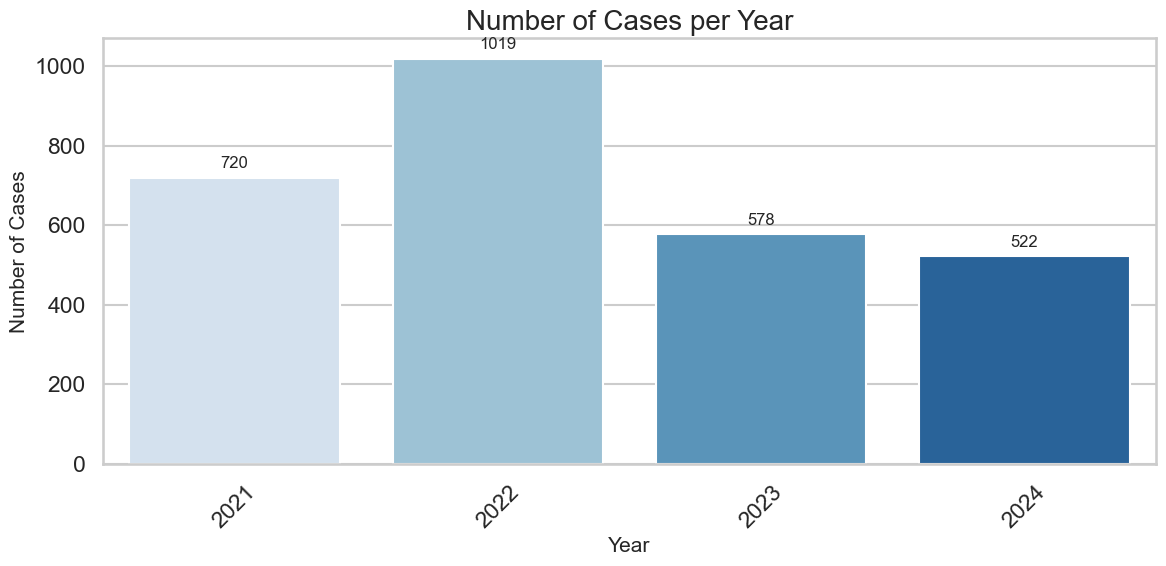

In [96]:
df['year'] = df['year'].astype(int)

sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='year', data=df, palette='Blues')

# Customize the plot
ax.set_title('Number of Cases per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Cases', fontsize=15)
plt.xticks(rotation=45)

# Add the exact value of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height().astype(int)}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

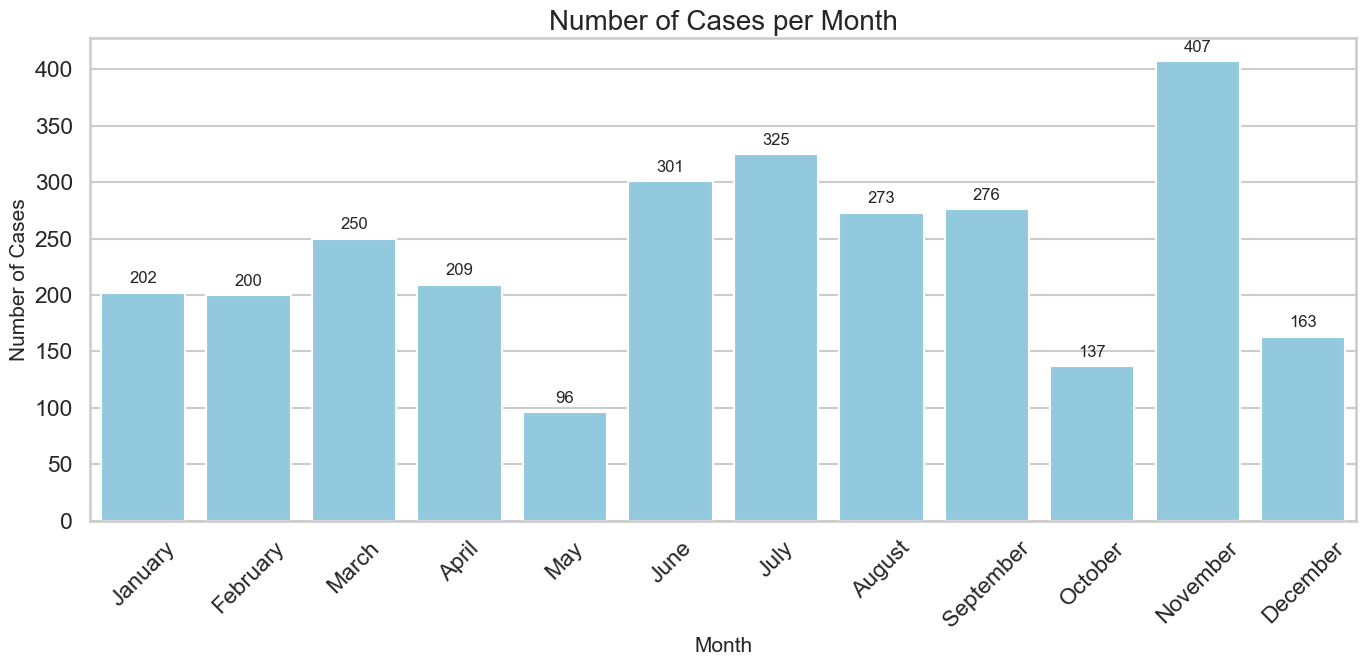

In [97]:
df['month'] = pd.Categorical(df['month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(14, 7))
ax = sns.countplot(x='month', data=df, color='skyblue')

# Customize the plot
ax.set_title('Number of Cases per Month', fontsize=20)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Cases', fontsize=15)
plt.xticks(rotation=45)

# Add the exact value of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height().astype(int)}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\suyog\AppData\Local\Temp\ipykernel_32012\3300782168.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['year_month'] = pd.Categorical(df['year_month'], categories=pd.date_range(start='1/1/2021', periods=48, freq='M').strftime('%Y-%B'), ordered=True)


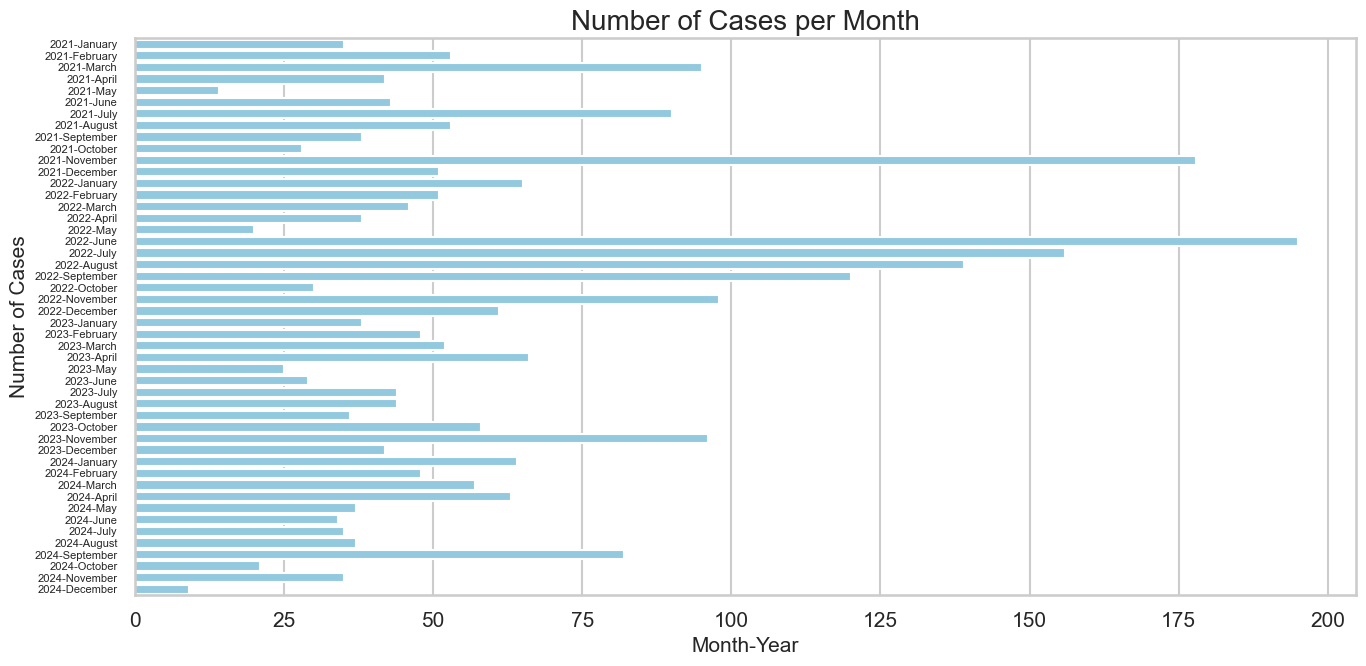

In [116]:
df['year_month'] = df['combined_date'].dt.strftime('%Y-%B')

# Ensure the 'year_month' column is of categorical type with the correct order
df['year_month'] = pd.Categorical(df['year_month'], categories=pd.date_range(start='1/1/2021', periods=48, freq='M').strftime('%Y-%B'), ordered=True)

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(14, 7))
ax = sns.countplot(y='year_month', data=df, color='skyblue')

# Customize the plot
ax.set_title('Number of Cases per Month', fontsize=20)
ax.set_xlabel('Month-Year', fontsize=15)
ax.set_ylabel('Number of Cases', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=8)

# Add the exact value of each bar
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()